In [71]:
import pandas as pd
from pandas import option_context
import numpy as np
import requests
import seaborn as sns
import datetime
import cliffsDelta as cd
import os
import matplotlib.pyplot as plt

from tqdm import tqdm
from statsmodels.stats.inter_rater import fleiss_kappa,aggregate_raters
from scipy.stats import mannwhitneyu,shapiro,ttest_ind

In [2]:
QUERY_ROOT = "https://api.github.com"
TOKEN = os.getenv('TOKEN')
HEADERS={'Authorization':'token '+TOKEN}

## Section 3

### Question 1

#### Write an automated Python script to identify the GitHub Apps in the list of accounts, by calling the GitHub Users API and extracting the required information to make this decision. 

#### More information: You can search for the "type" key in the obtianed JSON result, If it is "Bot", then it is an app, if it is "User", then it is an account.

In [90]:
# 1. Read the given .csv file into a pandas DataFrame (df).
# 2. Make sure there are 2 columns, one column name is "contributor" that has the name of the contributor, 
#    and another column name is "bothunter" that you will use later on in this assignment.
# 3. Display the DataFrame.

# YOUR CODE BELOW
df = pd.read_csv("./nodejs_node/nodejs_node.csv")
print(df.columns) # Yes there is 2 columns
df

Index(['contributor', 'bothunter'], dtype='object')


,contributor,bothunter
0,zzak,Human
1,GulajavaMinistudio,Human
2,yklcs,Human
3,melroy89,Human
4,pulkit-30,Human
5,BridgeAR,Human
6,fhinkel,Human
7,eugeneo,Human
8,indutny,Human
9,github-actions[bot],Bot


In [4]:
# 1. Store the names of the contributors in a list using the code snippet: 'df.contributor.to_list()'
# 2. print the list

# YOUR CODE BELOW
contributors = df.contributor.to_list()
contributors

['zzak',
 'GulajavaMinistudio',
 'yklcs',
 'melroy89',
 'pulkit-30',
 'BridgeAR',
 'fhinkel',
 'eugeneo',
 'indutny',
 'github-actions[bot]',
 'kapouer',
 'wraithgar',
 'davidben',
 'yorkie',
 'ujh',
 'trivikr',
 'bmeck',
 'kuriyosh',
 'ExE-Boss',
 'hadeelshahin',
 'bengl',
 'RafaelGSS',
 'ShogunPanda',
 'shipujin',
 'nodejs-github-bot',
 'H4ad',
 'fossamagna',
 'oleavr',
 'arcanis',
 'marco-ippolito',
 'jasongin',
 'StefanStojanovic',
 'debadree25',
 'mhdawson',
 'panva',
 'sapics',
 'mafintosh',
 'codecov-commenter',
 'malthe',
 'AndreasMadsen']

In [5]:
# 1. Using a for loop, iterate over each contributor in the list and query the GitHub Users API.
#    You can use "query = f'{QUERY_ROOT}/users/{contributor}'", where QUERY_ROOT is defined at the beginning of this notebook 
#    above and 'contributor' is each individul contributor from the list
# 2. Get the response using 'response = requests.get(query, headers=HEADERS)'.
# 3. convert the response to JSON using 'json_response = response.json()'.
# 4. Iterate over this JSON response and get the value of the 'type' key. If it is "Bot" then the contributor is an App, 
#    if "User" then the contributor is an account. You should boolean values to indicate if the contributor is an App (True) or User/Organisation (False)
# 5. Save these results in list of dictionary of the form [{'contributor': <contributor name>, 'app': <boolean value>}, {...}, {...}, {...}].
#    Lets call this list as "app_list_dict"
# 6. Finally convert this list of dictionary to DataFrame by writing 'pd.DataFrame.from_dict(app_dict)'
# 7. Display the DataFrame. This should have two columns - contributor and app

# YOUR CODE BELOW
app_list_dict = []
for contributor in contributors:
    query = f'{QUERY_ROOT}/users/{contributor}'
    response = requests.get(query, headers=HEADERS)
    json_response = response.json()
    is_app = json_response['type'] == "Bot"
    app_list_dict.append({'contributor': contributor,'app':is_app})

app_df = pd.DataFrame.from_dict(app_list_dict)
app_df

,contributor,app
0,zzak,False
1,GulajavaMinistudio,False
2,yklcs,False
3,melroy89,False
4,pulkit-30,False
5,BridgeAR,False
6,fhinkel,False
7,eugeneo,False
8,indutny,False
9,github-actions[bot],True


### Question 2

#### Add an app column in the CSV file to store this information. You can write True if it is an app and False if it is not.


In [6]:
# Merge the app DataFrame to df by writing 'pd.merge(df, <app df>, on='contributor'). This is similar to SQL join on primary key 'contributor'.
# The resultant df should have 3 columns - contributor, bothunter and app.

# YOUR CODE BELOW
df_merge_app = pd.merge(df, app_df, on='contributor')
df_merge_app.to_csv('./nodejs_node/nodejs_node_app.csv', index=False)

### Question 3

#### Report on the total number of GitHub Apps, and User accounts present in the list of accounts of your dataset.

In [7]:
print(df_merge_app[df_merge_app.app])

           contributor bothunter   app
9  github-actions[bot]       Bot  True


There is only one github apps and it's github action

## Section 4

### Question 1

#### Write an automated script to report on the prediction of the GitHub accounts in your dataset, using BoDeGHa and RABBIT bot identification tools. For each tool, your script should add an extra column to the CSV ﬁle of your dataset, reporting the prediction (bot, human, unknown) of the considered tool on the considered account.

#### More information:
You can write an automated script to execute BoDeGHa and RABBIT, and save the results in a DataFrame. For BoDeGHa, you can ask the tool to give the output in CSV format, save it as a csv file and read it in a DataFrame. For RABBIT, you can use its internal argument to store the results in a .csv file and read it in a DataFrame. Remember to read their Documentation (Readme.md) for their input arguments and example outputs before using these tools.  
Similar to what you did in Section 2 - Question 1 and 2, add an additional column named 'bodegha' to store the predictions 
given by BoDeGHa and add another column called 'rabbit' to store the preditions given by RABBIT. 

In [8]:
# Read the .csv file that has the predicitons given by BoDeGHa.

# YOUR CODE BELOW
df_bodegha = pd.read_csv("./nodejs_node/bodegha_predictions.csv")
df_bodegha = df_bodegha.rename(columns={"account":"contributor", "prediction":"bodegha"})
df_bodegha

,contributor,bodegha
0,github-actions[bot],Bot
1,nodejs-github-bot,Bot
2,BridgeAR,Human
3,H4ad,Human
4,RafaelGSS,Human
5,ShogunPanda,Human
6,StefanStojanovic,Human
7,arcanis,Human
8,bmeck,Human
9,debadree25,Human


In [9]:
# merge it to df - Now your df should have the following four columns - contributor, bothunter, app, bodegha

# YOUR CODE BELOW
df_merge_bodegha = pd.merge(df_merge_app, df_bodegha, on='contributor', how='left')
df_merge_bodegha = df_merge_bodegha.fillna("Unknown")
df_merge_bodegha

,contributor,bothunter,app,bodegha
0,zzak,Human,False,Unknown
1,GulajavaMinistudio,Human,False,Unknown
2,yklcs,Human,False,Unknown
3,melroy89,Human,False,Unknown
4,pulkit-30,Human,False,Human
5,BridgeAR,Human,False,Human
6,fhinkel,Human,False,Unknown
7,eugeneo,Human,False,Unknown
8,indutny,Human,False,Unknown
9,github-actions[bot],Bot,True,Bot


In [10]:
# Read the predictions given by RABBIT from the corresponding .csv file 

# YOUR CODE BELOW
df_rabbit = pd.read_csv("./nodejs_node/rabbit_predictions.csv")
df_rabbit

,Unnamed: 0,account,prediction,confidence
0,0,zzak,human,0.964
1,1,GulajavaMinistudio,bot,0.995
2,2,yklcs,human,0.998
3,3,melroy89,human,0.997
4,4,pulkit-30,human,0.998
5,5,BridgeAR,human,0.968
6,6,fhinkel,human,0.998
7,7,eugeneo,human,0.999
8,8,indutny,human,0.928
9,9,github-actions[bot],app,1.000


In [11]:
# merge it to df - Now your df should have the following five columns - contributor, bothunter, app, bodegha, rabbit

# YOUR CODE BELOW
df_rabbit = df_rabbit.rename(columns={"prediction":"rabbit", "account":"contributor"})

df_merge_rabbit = pd.merge(df_merge_bodegha, df_rabbit[["rabbit","contributor"]], on='contributor', how='left')
df_merge_rabbit

,contributor,bothunter,app,bodegha,rabbit
0,zzak,Human,False,Unknown,human
1,GulajavaMinistudio,Human,False,Unknown,bot
2,yklcs,Human,False,Unknown,human
3,melroy89,Human,False,Unknown,human
4,pulkit-30,Human,False,Human,human
5,BridgeAR,Human,False,Human,human
6,fhinkel,Human,False,Unknown,human
7,eugeneo,Human,False,Unknown,human
8,indutny,Human,False,Unknown,human
9,github-actions[bot],Bot,True,Bot,app


In [15]:
# Replace the prediction result given by rabbit from 'bot' to 'Bot', 'app' to 'Bot', 'human' to 'Human', 'unknown' to 'Unknown' to maintain consistency

# YOUR CODE BELOW
df_merge_rabbit.rabbit = df_merge_rabbit.rabbit.replace({"bot":"Bot","app":"Bot","human":"Human","unknown":"Unknown"})
df_merge_rabbit.to_csv('./nodejs_node/nodejs_node_tools.csv', index=False)
df_merge_rabbit.app = df_merge_rabbit.app.replace({False:"Human",True:"Bot"})
dfm = df_merge_rabbit
df_merge_rabbit

,contributor,bothunter,app,bodegha,rabbit
0,zzak,Human,Human,Unknown,Human
1,GulajavaMinistudio,Human,Human,Unknown,Bot
2,yklcs,Human,Human,Unknown,Human
3,melroy89,Human,Human,Unknown,Human
4,pulkit-30,Human,Human,Human,Human
5,BridgeAR,Human,Human,Human,Human
6,fhinkel,Human,Human,Unknown,Human
7,eugeneo,Human,Human,Unknown,Human
8,indutny,Human,Human,Unknown,Human
9,github-actions[bot],Bot,Bot,Bot,Bot


### Question 2

#### Add an extra column to the CSV ﬁle called 'manual' that has the label determined by you. For each account, of your own opinion on its nature (bot, human or unknown only in case of doubt) on the basis of a manual veriﬁcation of the contributor’s activities in the repository through the GitHub UI and through the GitHub Events API https://api.github.com/users/username/events, and taking into account the prediction made by the bot identification tools.

#### More information:
For each contributor, look at their activities in GitHub UI, look at their latest events using GitHub Events API - https://api.github.com/users/<contributor\>/events, to make a decision on their type. 

In addition, you should also write a very small reason why do you think they are bot or human (e.g., same activity at regular interval so Bot, files committed and code modified looks like Human, comments look like Human, comment look like Bot, test report looks automated so Bot, and so on....). This might be useful to answer the next question as well.

In [13]:
# Write your manual decision here
# example : 
# manual_list_dict = [{'contributor': 'tommens', 'manual': 'human'}, {....}, {....}, {....}]
# pd.DataFrame.from_dict(manual_list_dict)

# YOUR CODE BELOW

In [14]:
# merge it with df of predictions. Now your df should have the following six columns
# contributor, bothunter, app, bodegha, rabbit, manual

# YOUR CODE BELOW

### Question 3

#### Study and report the purpose of these identified bots and humans in the repository assigned to you. 

For example, the purpose can be based on but not limited to - 

the type of activities that they are performing (releasing a version on every Sunday, updating the documentation), type of comments they are posting (reviewing code, test summary report), when are they triggered (when a new PR is created, when someone in the project ask the bot to merge the code) and so on. \textbf{Note:} The purpose can be other than what is provided in examples above. 


- github-action bot is the bot that does all the different github action in the project
- nodejs-github-bot is an helper bot for the development of nodejs
- codecov-commenter is a bot that automatically comment on pull requests (PRs) with code coverage information

### Question 4

#### Create a column named 'type' to the CSV ﬁle and write your ﬁnal decision on the type of contributor. The ﬁnal decision on their type is the prediciton that majority of the raters predicted (you can ignore the 'Unknown'), in the case of contradiction, you can finalise it as Human.
#### Case 1: If two raters has mentioned a contributor as Bot and others mentioned it as 'Unknown', then the type of the account is Bot.  
#### Case 2: If 3 raters give 'Unknown' to a contributor then the prediction given by the fourth rater is final.
#### Case 3: If 2 raters give the prediciton as 'Bot' and 2 raters give it as 'Human', then the final decision is 'Human'
#### In this step, GitHub Apps should be marked as App and not as a Bot.

In [18]:
# Make a final decision on the type based on the predictions given by bothunter, bodegha, bothunter and your manual labelling. 
# Now your df should contain seven columns - contributor, bothunter, app, bodegha, rabbit, manual and type

# YOUR CODE BELOW
decision_df = df_merge_rabbit.copy()

def decide(row):
    counts = row.value_counts()
    if 'Unknown' in counts:
        counts.drop('Unknown', inplace=True)
    if len(counts) == 0:
        return 'Human'
    elif len(counts) == 1:
        return counts.index[0]
    elif len(counts) == 2: 
        if 'Bot' not in counts: 
            return 'Human'
        elif 'Human' not in counts: 
            return 'Bot'
        elif counts['Bot'] == counts['Human']: 
            return 'Human'
        else:
            return counts.idxmax()
    else:  
        return counts.idxmax()

decision_df['type'] = decision_df.apply(decide, axis=1)

decision_df.loc[decision_df['contributor'] == 'github-actions[bot]', 'type'] = 'App'
decision_df

,contributor,bothunter,app,bodegha,rabbit,type
0,zzak,Human,Human,Unknown,Human,Human
1,GulajavaMinistudio,Human,Human,Unknown,Bot,Human
2,yklcs,Human,Human,Unknown,Human,Human
3,melroy89,Human,Human,Unknown,Human,Human
4,pulkit-30,Human,Human,Human,Human,Human
5,BridgeAR,Human,Human,Human,Human,Human
6,fhinkel,Human,Human,Unknown,Human,Human
7,eugeneo,Human,Human,Unknown,Human,Human
8,indutny,Human,Human,Unknown,Human,Human
9,github-actions[bot],Bot,Bot,Bot,Bot,App


### Question 5 (a)

#### Compute and report the Fleiss Kappa interrater agreement score between the labels computed by all bot identiﬁcation tools.

##### For example:

converted_df = aggregate_raters(np.array(df[['rater1','rater2']]))  
kappa = fleiss_kappa(converted_df[0])  
print('kappa')  

In [19]:
def make_kappa(args):
    converted_df = aggregate_raters(np.array(dfm[args]))
    kappa = fleiss_kappa(converted_df[0])
    return kappa

#### a. between bothunter and rabbit

In [20]:
make_kappa(["bothunter","rabbit"])

0.6244131455399063

#### b. between bothunter and bodegha

In [21]:
make_kappa(["bothunter","bodegha"])

-0.17122851686823676

#### c. between bodegha and rabbit

In [22]:
make_kappa(["bodegha","rabbit"])

-0.08044627128596611

#### d. between bothunter, bodegha and rabbit

In [23]:
make_kappa(["bothunter","bodegha","rabbit"])

0.07459867799811126

### Question 5 (b)
#### Report on
#### a. What is you interpretation from the kappa values (use the table provided in the description document)? what do you understand?

bothunter and rabbit are substantial agreement
but bodegha is not in agreement with both bothunter and rabbit (slight agreement)

if we look at the agreement between the three, we can say that thet are in substantial agreement

#### b. Based on your previous analysis, which bot identification tool would you use, if you want to predict if a contributor is a human or bot? Motivate your answer

There is not a lot of difference between the result of rabbit and bothunter.

Rabbit find 3 more peoples as bot : GulajavaMinistudio, oleavr, sapics

and if we look to their github page we can see that they are humans and not bot.

With this analysis, bothunter is better

## Section 5

#### Query the GitHub Events API to get maximum possible events for each contributor (maximum is 300 events).  
#### You can use the following query: '{QUERY_ROOT}/users/{contributor}/events?per_page=100&page={page}' where page = 1 or 2 or 3  
#### As you did in earlier task, make a request to GitHub Events API with the required headers, convert the response to JSON, extract the following fields and store in a DataFrame:
Event id - json_response['event_id']  
Name of the contributor - json_response['actor']['login']  
Name of the repository - json_response['repository']['name']  
Type of event - json_response['type']  
Time of event - json_response['created_at']

#### Hint: Query the GitHubEvents API for all contributors. Append the obtained JSON result to a list of JSONs. Process one dictionary after other to get your required fields and store them in another list of dictionaries. Finally convert this dictionaty to DataFrame. OR You can directly convert the list of JSONs to DataFrame using pd.json_normalize() and select the required columns alone.

#### The resultant dataframe should have all the recent events performed by all the contributors and the following columns should be present in them - event_id, contributor, repo_name, event_type, created_at.


In [24]:
# YOUR CODE BELOW

data = {
    'event_id': [],
    'contributor': [],
    'repository': [],
    'type': [],
    'created_at': []
}
for contributor in contributors:
    for i in range(3):
        query = f'{QUERY_ROOT}/users/{contributor}/events?per_page=100&page={i+1}'
        response = requests.get(query, headers=HEADERS)
        json_response = response.json()
        for event in json_response:
            data['event_id'].append(event['id'])
            data['contributor'].append(event['actor']['login'])
            data['repository'].append(event['repo']['name'])
            data['type'].append(event['type'])
            data['created_at'].append(event['created_at'])

event_df = pd.DataFrame(data)

In [25]:
event_df.to_csv('nodejs_node/events.csv',index=False)

In [26]:
event_df

,event_id,contributor,repository,type,created_at
0,36826358748,zzak,zzak/dotfiles,PushEvent,2024-03-24T01:17:35Z
1,36825720514,zzak,rails/website,PullRequestEvent,2024-03-23T23:47:47Z
2,36825719357,zzak,rails/website,CreateEvent,2024-03-23T23:47:35Z
3,36779666969,zzak,zzak/ruby,PushEvent,2024-03-21T23:19:10Z
4,36779594009,zzak,zzak/rails,PushEvent,2024-03-21T23:17:35Z
...,...,...,...,...,...
8384,34760094421,AndreasMadsen,AndreasMadsen/yaml-ls-check,PushEvent,2024-01-11T20:35:22Z
8385,34759929331,AndreasMadsen,AndreasMadsen/yaml-ls-check,PushEvent,2024-01-11T20:28:00Z
8386,34759799010,AndreasMadsen,AndreasMadsen/yaml-ls-check,PushEvent,2024-01-11T20:23:37Z
8387,34759699541,AndreasMadsen,AndreasMadsen/yaml-ls-check,PushEvent,2024-01-11T20:17:42Z


### Question 1
#### Group each event into the following four categories

Issues: IssueCommentEvent, IssuesEvent  
Pull Requests: PullRequestEvent, PullRequestReviewCommentEvent  
Commits: CommitCommentEvent, PushEvent  
Repository: CreateEvent, DeleteEvent, ForkEvent, GollumEvent, MemberEvent, PublicEvent, ReleaseEvent, SponsorshipEvent, WatchEvent  

#### Hint:
1. Add a column called event_group that mentions which event group does that event belong to. Each event (row) should correspond to an event group.  
2. Then perform groupby on ['contributor','event_group'],  
3. use .agg (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html) to count the number of events performed by each contributor in each group,  
4. use pivot with the required arguments (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html). An example is given [here](#pivot_example) in question 2(b), and  
5. finally merge it with your 'type' field from the DataFrame you got in Section4

The final DataFrame should be looking like the following  
![](event_group.png)

In [27]:
# In the resultant DataFrame - each row should corespond to a contributor, and the columns should have all the event groups  
# and the type of the contributor (that you decided in the previous DataFrame) and the values should be the number 
# of events of that event event group the contriubutor has performed.

issue_group = ['IssueCommentEvent', 'IssuesEvent']
pr_group = ['PullRequestEvent', 'PullRequestReviewCommentEvent']
commit_group = ['CommitCommentEvent', 'PushEvent']
repo_group = ['CreateEvent', 'DeleteEvent', 'ForkEvent', 'GollumEvent', 'MemberEvent', 'PublicEvent', 'ReleaseEvent', 'SponsorshipEvent', 'WatchEvent']

In [33]:
# YOUR CODE BELOW
def get_event_type(_type):
    if _type in issue_group:
        return "Issues"
    elif _type in pr_group:
        return "Pull Requests"
    elif _type in commit_group:
        return "Commits"
    elif _type in repo_group:
        return "Repository"

df_events = event_df[['contributor','type']]
df_events["event_type"] = df_events['type'].apply(get_event_type)
df_events = df_events.drop(columns=["type"])
df_events

/tmp/ipykernel_177467/3250150416.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_events["event_type"] = df_events['type'].apply(get_event_type)


,contributor,event_type
0,zzak,Commits
1,zzak,Pull Requests
2,zzak,Repository
3,zzak,Commits
4,zzak,Commits
...,...,...
8384,AndreasMadsen,Commits
8385,AndreasMadsen,Commits
8386,AndreasMadsen,Commits
8387,AndreasMadsen,Commits


In [34]:
# YOUR CODE BELOW
grpby = df_events.groupby(["contributor","event_type"])
event_counts = grpby.size().reset_index(name='counts')
event_counts

,contributor,event_type,counts
0,AndreasMadsen,Commits,32
1,AndreasMadsen,Issues,14
2,AndreasMadsen,Pull Requests,29
3,AndreasMadsen,Repository,4
4,BridgeAR,Commits,4
...,...,...,...
147,yorkie,Repository,27
148,zzak,Commits,200
149,zzak,Issues,31
150,zzak,Pull Requests,31


In [54]:
events_final = event_counts.pivot(index='contributor', columns='event_type', values='counts')
events_final = events_final.reset_index()
events_final

event_type,contributor,Commits,Issues,Pull Requests,Repository
0,AndreasMadsen,32.0,14.0,29.0,4.0
1,BridgeAR,4.0,44.0,58.0,NaN
2,ExE-Boss,6.0,16.0,41.0,24.0
3,GulajavaMinistudio,107.0,NaN,193.0,NaN
4,H4ad,45.0,39.0,50.0,69.0
5,RafaelGSS,54.0,39.0,81.0,25.0
6,ShogunPanda,137.0,38.0,16.0,74.0
7,StefanStojanovic,54.0,48.0,31.0,7.0
8,arcanis,80.0,78.0,58.0,32.0
9,bengl,14.0,7.0,12.0,4.0


In [57]:
events_finalc = pd.merge(events_final, df)

In [58]:
events_finalc = events_finalc.fillna(0)
events_finalc = events_finalc.rename(columns={"bothunter": "type"})
events_finalc

,contributor,Commits,Issues,Pull Requests,Repository,type
0,AndreasMadsen,32.0,14.0,29.0,4.0,Human
1,BridgeAR,4.0,44.0,58.0,0.0,Human
2,ExE-Boss,6.0,16.0,41.0,24.0,Human
3,GulajavaMinistudio,107.0,0.0,193.0,0.0,Human
4,H4ad,45.0,39.0,50.0,69.0,Human
5,RafaelGSS,54.0,39.0,81.0,25.0,Human
6,ShogunPanda,137.0,38.0,16.0,74.0,Human
7,StefanStojanovic,54.0,48.0,31.0,7.0,Human
8,arcanis,80.0,78.0,58.0,32.0,Human
9,bengl,14.0,7.0,12.0,4.0,Human


### Question 2 (a)

#### Compute the median number of events per event group for Bot+Apps and Humans and write in DataFrame.

Row should correspond to type (Bot_App and Human), Column should have Event group name and the values should be the median value of Bot_App or Human for that particular event group. An example is given below

In [43]:
# For example:
medians = [{'event_group': 'event_group1', 'median': 'val1', 'type': 'Bot_app'}, 
           {'event_group': 'event_group1', 'median': 'val2', 'type': 'Human'},
           {'event_group': 'event_group2', 'median': 'val3', 'type': 'Bot_app'},
           {'event_group': 'event_group2', 'median': 'val4', 'type': 'Human'},
           {'event_group': 'event_group3', 'median': 'val5', 'type': 'Bot_app'},
           {'event_group': 'event_group3', 'median': 'val6', 'type': 'Human'},
           {'event_group': 'event_group4', 'median': 'val7', 'type': 'Bot_app'},
           {'event_group': 'event_group5', 'median': 'val8', 'type': 'Human'}]
df_medians = pd.DataFrame.from_dict(medians)
df_medians

,event_group,median,type
0,event_group1,val1,Bot_app
1,event_group1,val2,Human
2,event_group2,val3,Bot_app
3,event_group2,val4,Human
4,event_group3,val5,Bot_app
5,event_group3,val6,Human
6,event_group4,val7,Bot_app
7,event_group5,val8,Human


In [67]:
# YOUR CODE BELOW
melted_df = pd.melt(events_finalc, id_vars=['type'], value_vars=['Commits', 'Issues', 'Pull Requests', 'Repository'], var_name='event_group', value_name='value')
result = melted_df.groupby(['type', 'event_group']).median().reset_index()
result

,type,event_group,value
0,Bot,Commits,31.0
1,Bot,Issues,165.0
2,Bot,Pull Requests,4.0
3,Bot,Repository,10.0
4,Human,Commits,61.0
5,Human,Issues,23.0
6,Human,Pull Requests,41.0
7,Human,Repository,26.0


### Question 2 (b)

Plot a heatmap of the DataFrame using seaborn - 
1. First convert the dataframe to the required format using pivot, example is given below
2. plot using seaborn - sns.heatmap(df_medians, annot=True, vmin=0, vmax=300, cmap="crest"). More details: https://seaborn.pydata.org/generated/seaborn.heatmap.html)

#### pd.pivot example:
<a id='pivot_example'></a>

In [ ]:
# Main DataFrame
medians = [{'event_group': 'event_group1', 'median': 'val1', 'type': 'Bot_app'}, 
           {'event_group': 'event_group1', 'median': 'val2', 'type': 'Human'},
           {'event_group': 'event_group2', 'median': 'val3', 'type': 'Bot_app'},
           {'event_group': 'event_group2', 'median': 'val4', 'type': 'Human'},
           {'event_group': 'event_group3', 'median': 'val5', 'type': 'Bot_app'},
           {'event_group': 'event_group3', 'median': 'val6', 'type': 'Human'},
           {'event_group': 'event_group4', 'median': 'val7', 'type': 'Bot_app'},
           {'event_group': 'event_group5', 'median': 'val8', 'type': 'Human'}]
df_medians = pd.DataFrame.from_dict(medians)
df_medians

,event_group,median,type
0,event_group1,val1,Bot_app
1,event_group1,val2,Human
2,event_group2,val3,Bot_app
3,event_group2,val4,Human
4,event_group3,val5,Bot_app
5,event_group3,val6,Human
6,event_group4,val7,Bot_app
7,event_group5,val8,Human


In [68]:
# pivot the main DataFrame
df_medians.pivot(index='type', columns='event_group', values='median')#.reset_index().rename_axis(None,axis=1)

event_group,event_group1,event_group2,event_group3,event_group4,event_group5
type,,,,,
Bot_app,val1,val3,val5,val7,NaN
Human,val2,val4,val6,NaN,val8


In [69]:
# YOUR CODE BELOW
pivot_df = result.pivot(index='type', columns='event_group', values='value')
pivot_df = pivot_df.reset_index().rename_axis(None, axis=1)
pivot_df

,type,Commits,Issues,Pull Requests,Repository
0,Bot,31.0,165.0,4.0,10.0
1,Human,61.0,23.0,41.0,26.0


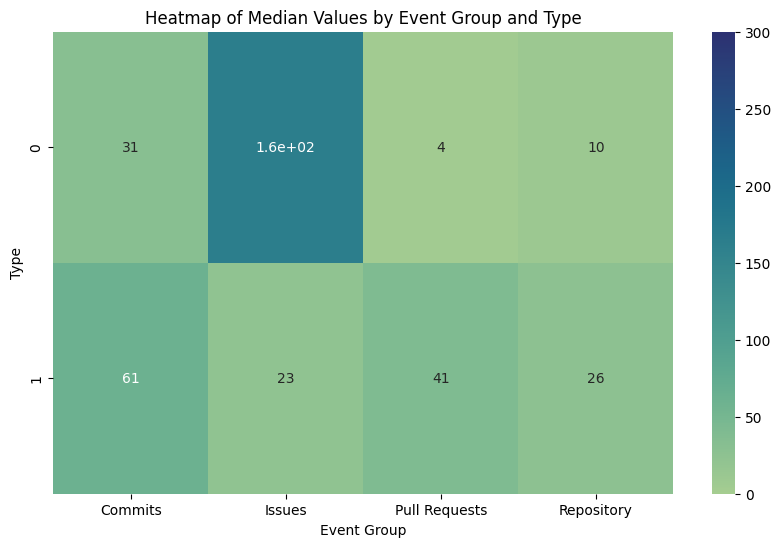

In [73]:
# YOUR CODE BELOW
heatmap_df = pivot_df.drop(columns='type')

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_df, annot=True, vmin=0, vmax=300, cmap="crest")
plt.title("Heatmap of Median Values by Event Group and Type")
plt.xlabel("Event Group")
plt.ylabel("Type")
plt.show()

#### What is the difference that you observe between Bots+Apps and Humans?

Bot open a lot more issues than human

#### What is the differnce that you observe between Event groups?

For human, there is no big difference. For bots, there is a lot more Issues than the other event group.

#### What is the difference that you observe between Bots+Apps and Humans and Event groups all considering at the same time?

Bot open a lot more issues than human

### Question 3

#### Create box plots or boxen plots or violin plots or a combination of these to visualise the distribution of number of events in each event group. 
#### For more information you can visit - https://seaborn.pydata.org/tutorial/categorical.html#categorical-tutorial  
#### For violin plots - https://seaborn.pydata.org/generated/seaborn.violinplot.html  
#### You should highlight the data points that correspond to bots using a stripplot in seaborn. https://seaborn.pydata.org/tutorial/categorical.html#categorical-tutorial  
#### Interpret the results of the visualisation.

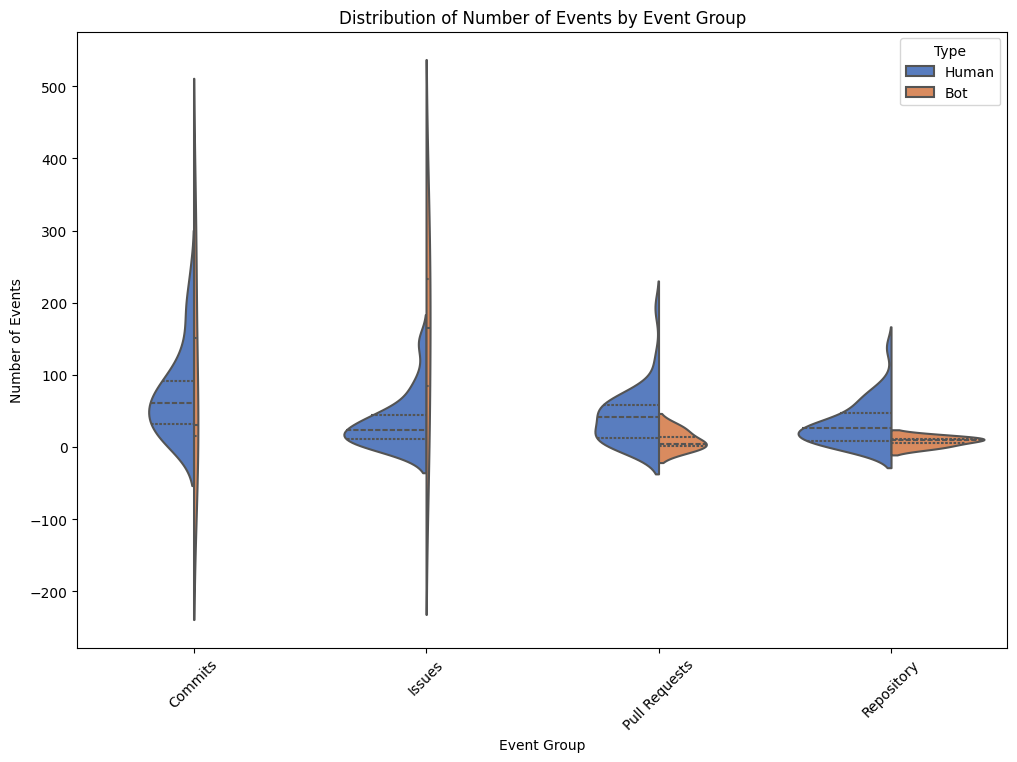

In [76]:
# YOUR CODE BELOW - Visualize number of events from pull request event group
plt.figure(figsize=(12, 8))
sns.violinplot(x='event_group', y='value', hue='type', data=melted_df, split=True, inner="quart", linewidth=1.5, palette="muted")
sns.stripplot(x='event_group', y='value', hue='type', data=melted_df[melted_df['type'] == 'Bot_App'], dodge=True, size=5, alpha=0.7, linewidth=1, marker='o', edgecolor='black')
plt.title("Distribution of Number of Events by Event Group")
plt.xlabel("Event Group")
plt.ylabel("Number of Events")

plt.legend(title='Type')
plt.xticks(rotation=45)
plt.show()


### Question 4.1

#### Statistical identify whether number of events in each event group is normally distributed or not.
#### Null hypothesis - $H_0$: Sample comes from the data that has normal distribution.
#### Use Shapiro-Wilk test for this purpose. Use the p-value with a threshold of 0.05 to determine whether $H_0$ can be rejected with statistical significance or not. 

#### Use shapiro from scipy.stats to perform this test (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html)

In [77]:
# YOUR CODE BELOW
for event_group in melted_df['event_group'].unique():
    data = melted_df[melted_df['event_group'] == event_group]['value']
    stat, p_value = shapiro(data)
    
    print(f"Event Group: {event_group}")
    print(f"Shapiro-Wilk Test Statistic: {stat:.4f}")
    print(f"P-value: {p_value:.4f}")
    
    if p_value < 0.05:
        print("Reject the null hypothesis: The data does not follow a normal distribution.")
    else:
        print("Fail to reject the null hypothesis: The data follows a normal distribution.")
    
    print()

Event Group: Commits
Shapiro-Wilk Test Statistic: 0.8666
P-value: 0.0002
Reject the null hypothesis: The data does not follow a normal distribution.

Event Group: Issues
Shapiro-Wilk Test Statistic: 0.6874
P-value: 0.0000
Reject the null hypothesis: The data does not follow a normal distribution.

Event Group: Pull Requests
Shapiro-Wilk Test Statistic: 0.8249
P-value: 0.0000
Reject the null hypothesis: The data does not follow a normal distribution.

Event Group: Repository
Shapiro-Wilk Test Statistic: 0.8506
P-value: 0.0001
Reject the null hypothesis: The data does not follow a normal distribution.



### Question 4.2
#### Determine if there is any statistical diﬀerence in number of events between the identified event groups. Perform this test on all pairs of event groups. 
#### Null hypothesis - $H_0$: Any two event group come from the same population.
#### If $H_0$ is rejected in Shapiro-Wilk test (at least for one of the two event groups considered for test), use the Mann-Whitney U statistical test for this purpose. If $H_0$ is not rejected in Shapiro-Wilk test, use the independent t-test for this purpose.  
#### In any case, use the p-value with a threshold of 0.01 to determine whether $H_0$ can be rejected with statistical significance. 

#### Use mannwhitneyu from scipy.stats to perform Mann-Whitney U test (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html) 
#### or 
#### ttest_ind from scipy.stats to perform independent t-test https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html.

#### More information:

You can pass the following arguments to mannwhitneyu from scipy.stats - (method='exact', nan_policy='omit'). For ttest_ind you can use - (nan_policy='omit')

In [78]:
# YOUR CODE BELOW
groups_to_test = []

for event_group in melted_df['event_group'].unique():
    data = melted_df[melted_df['event_group'] == event_group]['value']
    stat, p_value = shapiro(data)
    if p_value < 0.01:
        groups_to_test.append(event_group)

for i in range(len(groups_to_test)):
    for j in range(i + 1, len(groups_to_test)):
        group1 = melted_df[melted_df['event_group'] == groups_to_test[i]]['value']
        group2 = melted_df[melted_df['event_group'] == groups_to_test[j]]['value']
        if len(group1) > 20 and len(group2) > 20:
            stat, p_value = ttest_ind(group1, group2)
            test_used = "Independent t-test"
        else:
            stat, p_value = mannwhitneyu(group1, group2, alternative='two-sided')
            test_used = "Mann-Whitney U test"
        print(f"Comparing {groups_to_test[i]} and {groups_to_test[j]}:")
        print(f"Test Used: {test_used}")
        print(f"Test Statistic: {stat:.4f}")
        print(f"P-value: {p_value:.4f}")

        if p_value < 0.01:
            print("Reject the null hypothesis: There is a statistical difference between the two event groups.")
        else:
            print("Fail to reject the null hypothesis: There is no statistical difference between the two event groups.")
        
        print()

Comparing Commits and Issues:
Test Used: Independent t-test
Test Statistic: 2.1772
P-value: 0.0325
Fail to reject the null hypothesis: There is no statistical difference between the two event groups.

Comparing Commits and Pull Requests:
Test Used: Independent t-test
Test Statistic: 2.9822
P-value: 0.0038
Reject the null hypothesis: There is a statistical difference between the two event groups.

Comparing Commits and Repository:
Test Used: Independent t-test
Test Statistic: 3.9025
P-value: 0.0002
Reject the null hypothesis: There is a statistical difference between the two event groups.

Comparing Issues and Pull Requests:
Test Used: Independent t-test
Test Statistic: 0.5112
P-value: 0.6106
Fail to reject the null hypothesis: There is no statistical difference between the two event groups.

Comparing Issues and Repository:
Test Used: Independent t-test
Test Statistic: 1.3890
P-value: 0.1688
Fail to reject the null hypothesis: There is no statistical difference between the two event gr

### Question 5
#### Each time you reject the null hypothesis $H_0$, quantify the effect size of the diﬀerence between the groups using cliﬀ’s delta ($\delta$). 
#### To calculate cliﬀ’s delta, you can pass the list of values to cliﬀ delta.py file given in the repository. E.g., cliffsDelta.cliffsDelta(list of values). This will return the effect size and its interpretation (negligible, small, medium, large).

In [79]:
# YOU CODE BELOW
from cliffsDelta import cliffsDelta

for i in range(len(groups_to_test)):
    for j in range(i + 1, len(groups_to_test)):
        group1 = melted_df[melted_df['event_group'] == groups_to_test[i]]['value']
        group2 = melted_df[melted_df['event_group'] == groups_to_test[j]]['value']
        
        if len(group1) > 20 and len(group2) > 20:
            stat, p_value = ttest_ind(group1, group2)
            test_used = "Independent t-test"
        else:
            stat, p_value = mannwhitneyu(group1, group2, alternative='two-sided')
            test_used = "Mann-Whitney U test"
        
        print(f"Comparing {groups_to_test[i]} and {groups_to_test[j]}:")
        print(f"Test Used: {test_used}")
        print(f"Test Statistic: {stat:.4f}")
        print(f"P-value: {p_value:.4f}")

        if p_value < 0.01:
            print("Reject the null hypothesis: There is a statistical difference between the two event groups.")
            delta, _ = cliffsDelta(list(group1), list(group2))
            print(f"Cliff's Delta: {delta:.4f}")
        else:
            print("Fail to reject the null hypothesis: There is no statistical difference between the two event groups.")
        
        print()

Comparing Commits and Issues:
Test Used: Independent t-test
Test Statistic: 2.1772
P-value: 0.0325
Fail to reject the null hypothesis: There is no statistical difference between the two event groups.

Comparing Commits and Pull Requests:
Test Used: Independent t-test
Test Statistic: 2.9822
P-value: 0.0038
Reject the null hypothesis: There is a statistical difference between the two event groups.
Cliff's Delta: 0.3638

Comparing Commits and Repository:
Test Used: Independent t-test
Test Statistic: 3.9025
P-value: 0.0002
Reject the null hypothesis: There is a statistical difference between the two event groups.
Cliff's Delta: 0.4806

Comparing Issues and Pull Requests:
Test Used: Independent t-test
Test Statistic: 0.5112
P-value: 0.6106
Fail to reject the null hypothesis: There is no statistical difference between the two event groups.

Comparing Issues and Repository:
Test Used: Independent t-test
Test Statistic: 1.3890
P-value: 0.1688
Fail to reject the null hypothesis: There is no sta

### Qusetion 6

#### Create violinplots to visualise the distributions for the following metrics and answer the questions that follow it. You should highlight the data points corresponding to bots using a stripplot in seaborn.

#### Hint:

1. Merge you DataFrame of event with the type of contributor that you identified in section 3.
2. Write a function that you will use for all the seaborn plots. This way you can reduce duplication and update it easily.

In [109]:
merged_df = pd.merge(df_events, df, on='contributor', how='inner')

def create_violinplot(data, x, y, hue, title):
    sns.violinplot(data=data, x=x, y=y, hue=hue, inner=None)
    sns.stripplot(data=data, x=x, y=y, hue=hue, dodge=True, alpha=0.5)
    plt.title(title)
    plt.show()

def plot_mean_events(data, title):
    sns.violinplot(data=data, inner=None)
    sns.stripplot(data=data, dodge=True, alpha=0.5)
    plt.title(title)
    plt.xlabel('Event Type/Group')
    plt.ylabel('Mean number of events')
    plt.xticks(rotation=45, ha='right')
    plt.show()

#### Total number of events

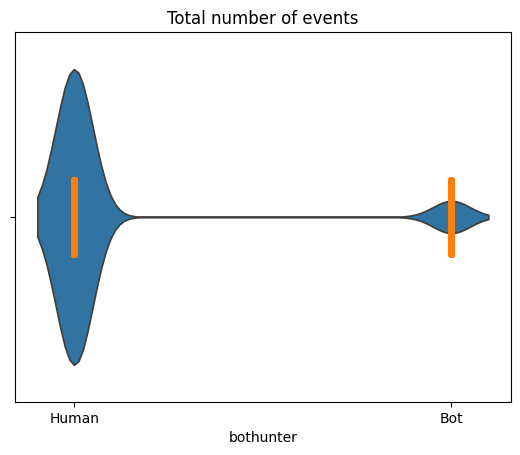

In [94]:
total_events = merged_df.groupby('contributor').size()
create_violinplot(merged_df, 'bothunter', total_events.name, None, 'Total number of events')

#### Number of event types

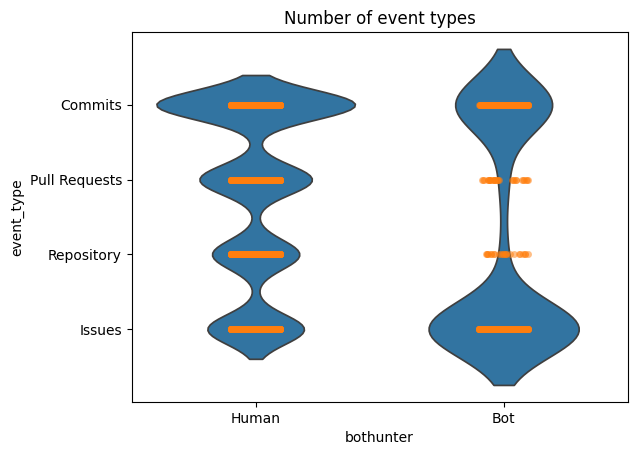

In [96]:
# YOUR CODE BELOW
event_types = merged_df.groupby('contributor')['event_type'].nunique()
create_violinplot(merged_df, 'bothunter', event_types.name, None, 'Number of event types')

#### Mean number of events per event type

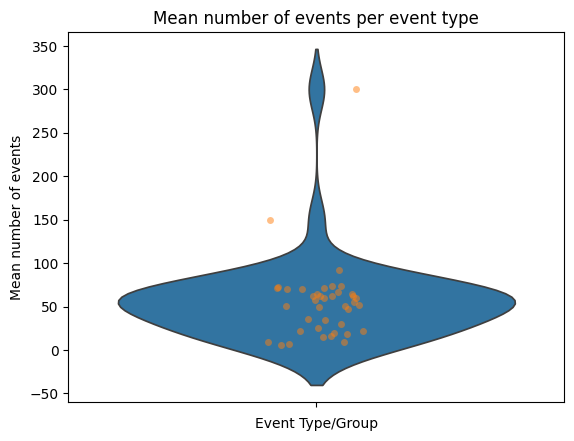

In [110]:
# YOUR CODE BELOW
mean_events_per_type = merged_df.groupby(['contributor', 'event_type']).size().reset_index(name='count')
mean_events_per_type = mean_events_per_type.groupby('contributor')['count'].mean()
plot_mean_events(mean_events_per_type, 'Mean number of events per event type')


#### Mean number of events per event group

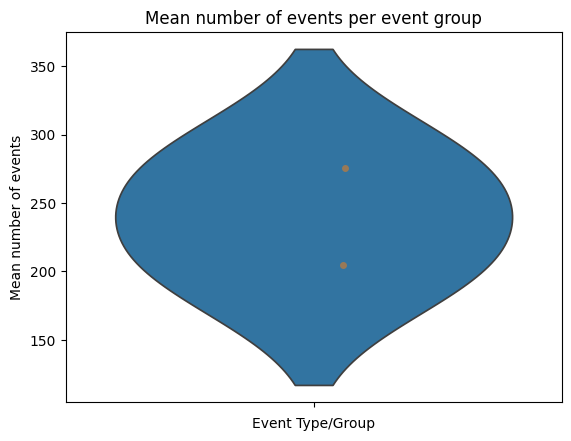

In [113]:
# YOUR CODE BELOW
mean_events_per_group = merged_df.groupby(['contributor', 'bothunter']).size().reset_index(name='count')
mean_events_per_group = mean_events_per_group.groupby('bothunter')['count'].mean()
plot_mean_events(mean_events_per_group, 'Mean number of events per event group')

#### Gini coeﬃcient of time between consecutive event

In [114]:
def time_diffs(time_stamps):
    diff_time_stamps = np.array([])
    for i in range(len(time_stamps)-1):
        diff = (time_stamps.iloc[i+1] - time_stamps.iloc[i])/pd.to_timedelta('1 second')
        diff_time_stamps = np.append(diff_time_stamps, [diff])
    return(diff_time_stamps)

In [115]:
def gini(time_stamps):
    '''
    args: time_stamps - Series of time stamps for a contributor
    
    return: g_coeff - float that gives gini coefficient
    
    method: calculate the Gini coefficient of a numpy array
    '''
    array = time_diffs(time_stamps)
    array = array[array!=0]
    if len(array) == 0:
        return np.float64(0.0)
    array = array.flatten()
    array = np.sort(array)
    index = np.arange(1, array.shape[0] + 1)
    n = array.shape[0]
    g_coeff = (np.sum((2 * index - n - 1) * array)) / (n * np.sum(array))
    
    return (g_coeff.round(4))

You can pass a Series of time-stamps to gini(time_stamps) function to get the Gini coeﬃcient
#### Hint:
1. Groupby the contributors on 'contributor' and use gini as .agg function on 'created_at'.
2. Merge the resultant DataFram with their type (the df that you got in section 4)
3. Make box/boxen/violin plots on those gini values

In [ ]:
# YOUR CODE BELOW


### Question 6.1

#### Do you ﬁnd any set of accounts having a diverging behaviour? (Hint: look for outliers.)

Both in the violon plot of the number of events and type of events, we can see that bot have a diverging behaviour

### Question 6.2

#### What is the type of the accounts that have diverging behaviour?

Bots

### Question 6.3

#### Do bots have different behaviour than apps? Motivate your answer

### Question 6.4

#### Do bots and apps have a diﬀerent behaviour from human accounts? (Hint: in the box plots ﬁnd where the bots and apps are located and find where the humans are located)

### Question 6.5

#### Do all bots (other than outliers) have the same behaviour? List the bots that have a diﬀerent behaviour. Mention your interpretation on the cause of this diverging behaviour compared to other bots?

Not enough bot in my dataset to make a good conclusion